<a href="https://colab.research.google.com/github/Sathwik-parimi-07/woc/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv(r"/content/drive/MyDrive/woc drive/unsupervised_data.csv")

In [ ]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         40000 non-null  int64  
 1   Feature_1  40000 non-null  float64
 2   Feature_2  40000 non-null  float64
 3   Feature_3  40000 non-null  float64
 4   Feature_4  40000 non-null  float64
 5   Feature_5  40000 non-null  float64
 6   Feature_6  40000 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.1 MB


ID  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6
0   1 -21.904591 -22.659091  12.805995 -46.631935 -34.347081 -21.989738
1   2 -28.662385  68.757081  31.761821   3.982259 -62.876866 -61.838563
2   3 -62.551204  60.909235   8.112918  24.110050 -64.372336  70.681940
3   4  14.428024 -48.326045 -65.576518  76.027549  69.966852  48.023953
4   5   9.780285 -55.643172 -72.737299  74.180123  67.873327  41.128015

In [ ]:
data2=data.drop(columns=['ID'],axis=1)

In [ ]:
x=data2.iloc[:,:-1].values
y=data2.iloc[:,-1].values

In [ ]:
def plot_progress_kMeans(X, centroids, previous_centroids, clusters, iteration):
    plt.figure(figsize=(8, 6))

    # Plot data points
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'brown', 'pink']
    for i, cluster in enumerate(clusters):
        points = X[cluster]
        plt.scatter(points[:, 0], points[:, 1], color=colors[i % len(colors)], s=30, label=f'Cluster {i+1}')

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=100, label='Centroids')
    plt.title(f'K-means Progress - Iteration {iteration}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def initialize_random_centroids(K, X):
    m = X.shape[0]
    random_indices = np.random.choice(m, K, replace=False)
    return X[random_indices]

In [ ]:
def create_clusters(centroids, K, X):
    clusters = [[] for _ in range(K)]
    for idx, sample in enumerate(X):
        closest_idx = np.argmin([np.linalg.norm(sample - centroid) for centroid in centroids])
        clusters[closest_idx].append(idx)
    return clusters

In [ ]:
def compute_means(clusters, K, X):
    centroids = np.zeros((K, X.shape[1]))
    for cluster_idx, cluster in enumerate(clusters):
        if cluster:  # Avoid division by zero for empty clusters
            centroids[cluster_idx] = np.mean(X[cluster], axis=0)
    return centroids

In [ ]:
def compute_wcss(centroids, clusters, X):
    wcss = 0
    for cluster_idx, cluster in enumerate(clusters):
        for idx in cluster:
            wcss += np.linalg.norm(X[idx] - centroids[cluster_idx]) ** 2
    return wcss


In [ ]:
def run_Kmeans(K, X, max_iterations=500, plot_progress=False):
    centroids = initialize_random_centroids(K, X)
    print(f"Initial centroids:\n{centroids}")

    for iteration in range(max_iterations):
        print(f"K-Means iteration {iteration + 1}/{max_iterations}")

        # Create clusters by assigning samples to the closest centroids
        clusters = create_clusters(centroids, K, X)
        previous_centroids = centroids

        # Compute new centroids
        centroids = compute_means(clusters, K, X)

        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, clusters, iteration + 1)

        # Check for convergence (if centroids do not change)
        if np.allclose(previous_centroids, centroids):
            print("Convergence reached!")
            break

    # Compute WCSS
    wcss = compute_wcss(centroids, clusters, X)
    return clusters, centroids, wcss


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def elbow_method(X, max_K=10):
    wcss_values = []
    K_values = range(1, max_K + 1)

    for K in K_values:
        _, _, wcss = run_Kmeans(K=K, X=X, max_iterations=100)
        wcss_values.append(wcss)
        print(f"K: {K}, WCSS: {wcss}")

    # Plot the elbow curve
    plt.figure(figsize=(8, 6))
    plt.plot(K_values, wcss_values, 'bo-', markersize=8)
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.grid(True)
    plt.show()

    # Calculate the rate of change (first and second derivative)
    wcss_values = np.array(wcss_values)
    diff1 = np.diff(wcss_values)
    diff2 = np.diff(diff1)

    # The optimal K is where the second derivative is maximized (elbow point)
    optimal_K = np.argmin(diff2) + 2  # +2 because np.diff reduces the size by 1
    print(f"Optimal K: {optimal_K}")

    return optimal_K


Initial centroids:
[[ 68.86864993 -49.82164551 -46.31392344 -44.86414033 -32.16626773]]
K-Means iteration 1/100
K-Means iteration 2/100
Convergence reached!
K: 1, WCSS: 383598811.97332394
Initial centroids:
[[-21.94658466  80.38963609  30.21073368  19.79191003 -42.9362995 ]
 [ -7.42881654  32.21616857 -42.10558429   3.83659974  10.84800267]]
K-Means iteration 1/100
K-Means iteration 2/100
K-Means iteration 3/100
Convergence reached!
K: 2, WCSS: 241966011.88163173
Initial centroids:
[[ -5.17319034 -37.50645476  10.43748149 -56.85160744 -42.19070223]
 [ 11.06247086 -40.2975265  -60.90492741  67.4401809   67.94211796]
 [-18.31811435 -62.48818973  25.53944187 -10.21689159 -60.28288507]]
K-Means iteration 1/100
K-Means iteration 2/100
K-Means iteration 3/100
K-Means iteration 4/100
K-Means iteration 5/100
K-Means iteration 6/100
Convergence reached!
K: 3, WCSS: 124182324.55759393
Initial centroids:
[[ 21.86270788 -40.70457622 -76.4572899   61.36234776  71.10461569]
 [ 24.76691714 -60.840135

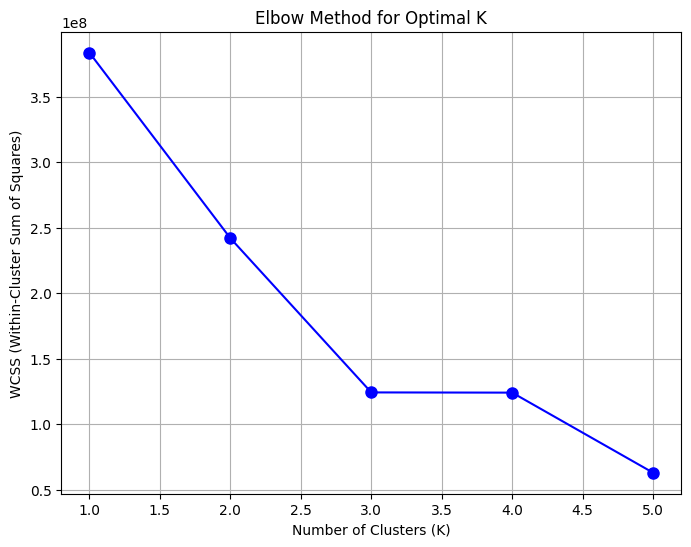

Optimal K: 4


In [ ]:
optimal_K = elbow_method(x, max_K=5)

Initial centroids:
[[ 15.82489951 -65.0322541  -66.95733267  72.6305909   62.02540898]
 [ 17.28601956 -52.27026379 -73.39905071  70.02296922  75.18330141]
 [-20.06252658  33.59231267 -46.45966166  -4.73813728   5.23519455]
 [  1.77131897 -66.48182657 -62.65660404  73.54928327  80.64467497]]
K-Means iteration 1/100


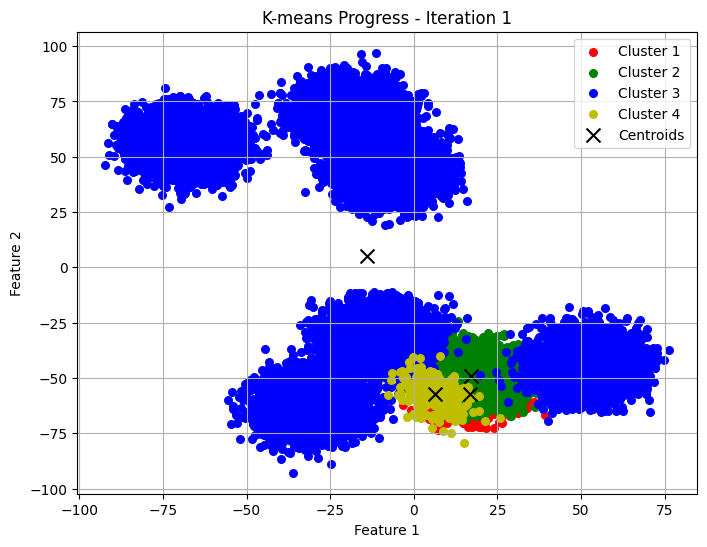

K-Means iteration 2/100


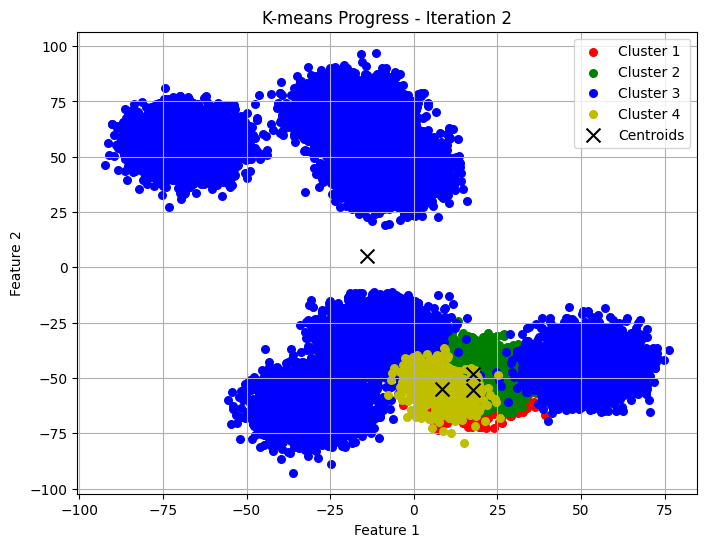

K-Means iteration 3/100


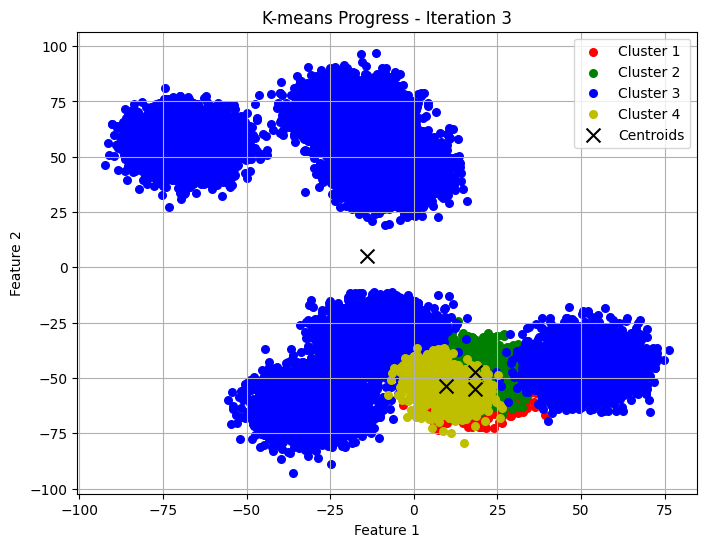

K-Means iteration 4/100


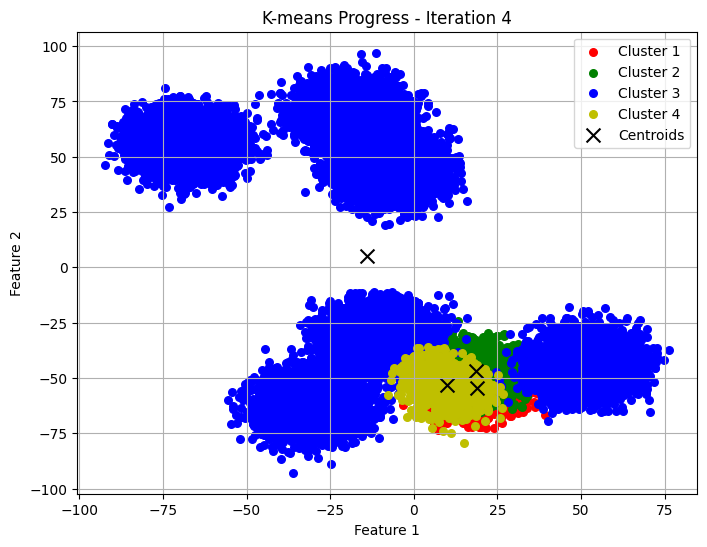

K-Means iteration 5/100


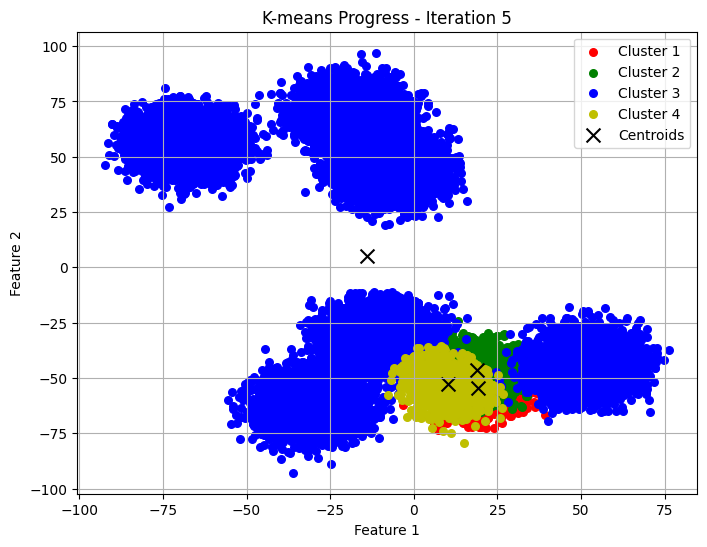

K-Means iteration 6/100


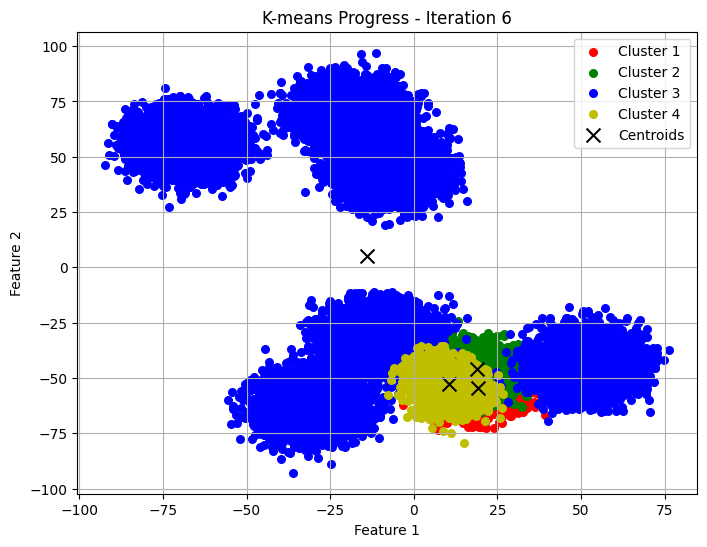

K-Means iteration 7/100


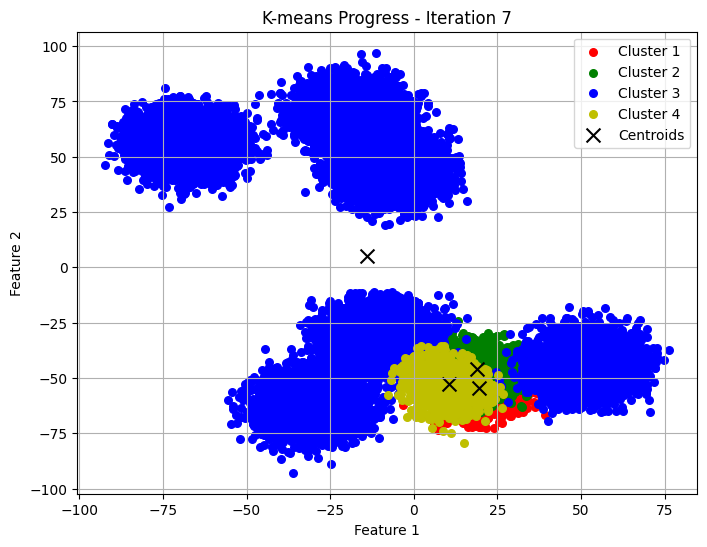

K-Means iteration 8/100


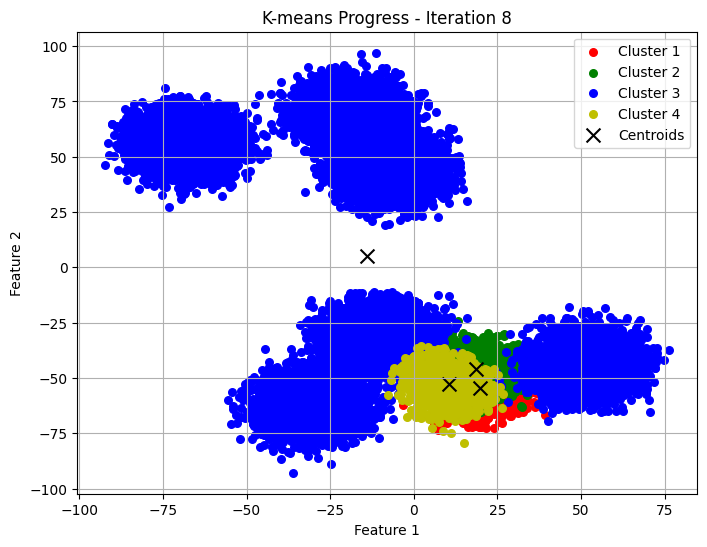

K-Means iteration 9/100


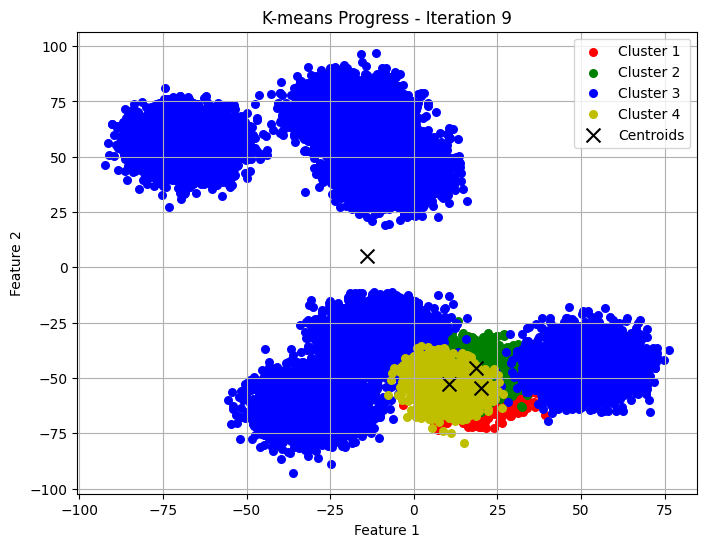

K-Means iteration 10/100


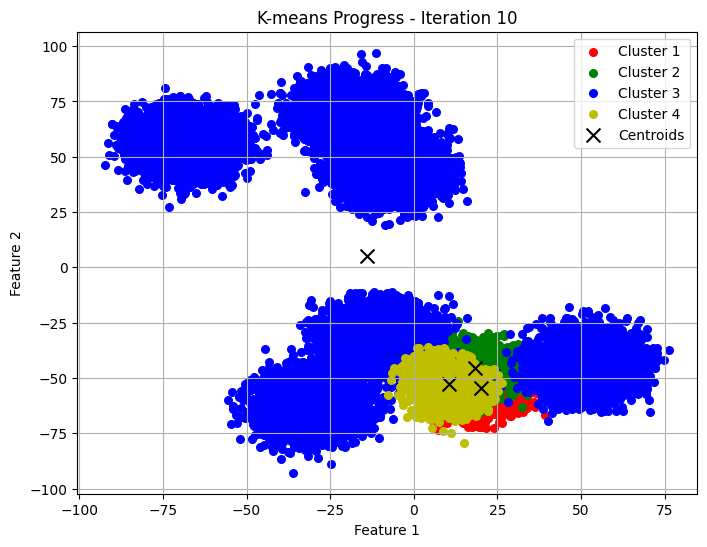

K-Means iteration 11/100


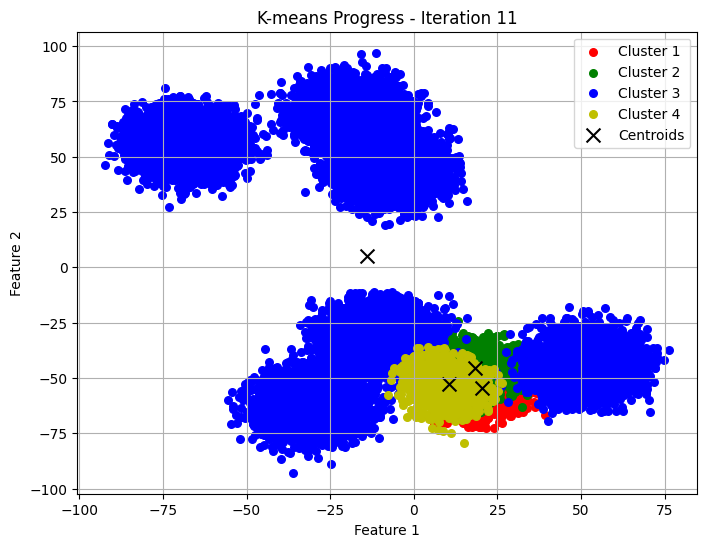

K-Means iteration 12/100


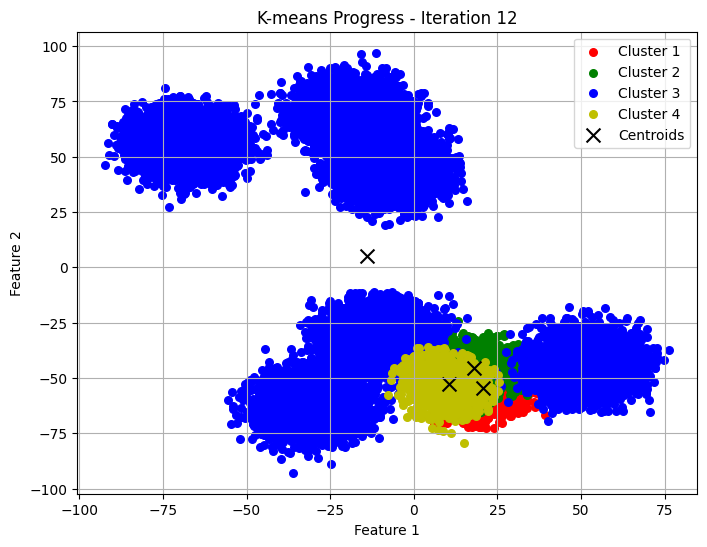

K-Means iteration 13/100


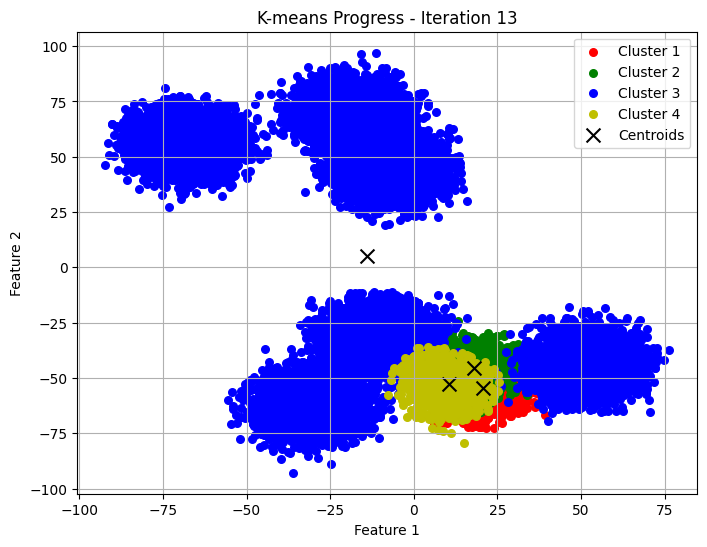

K-Means iteration 14/100


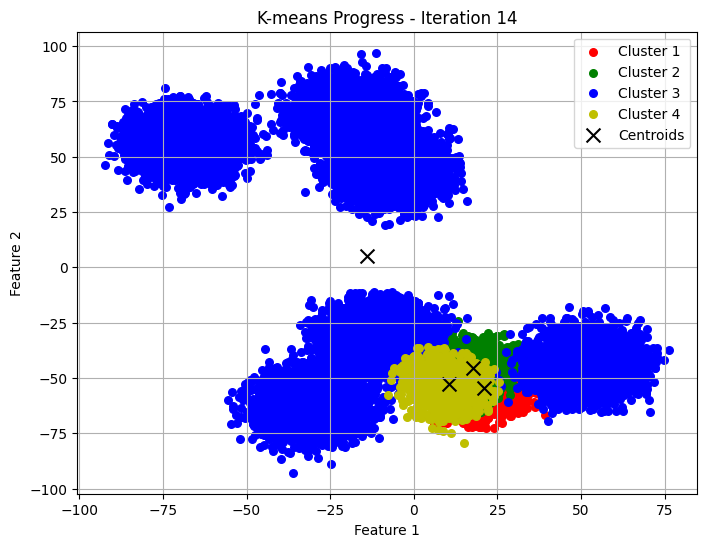

K-Means iteration 15/100


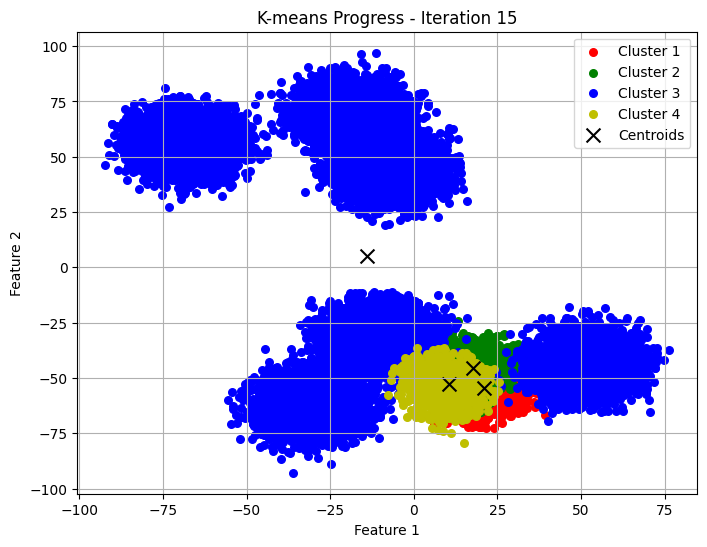

K-Means iteration 16/100


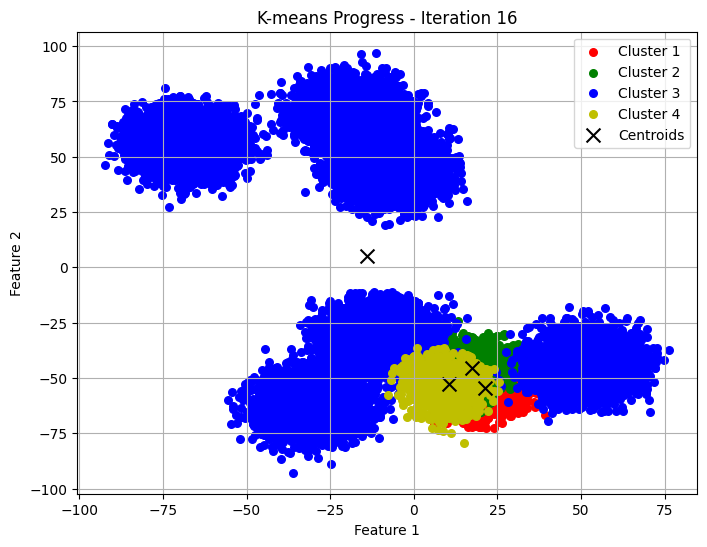

K-Means iteration 17/100


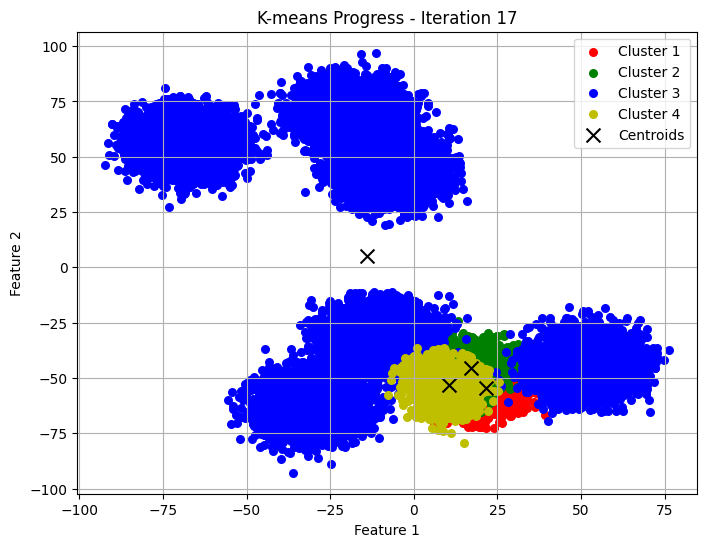

K-Means iteration 18/100


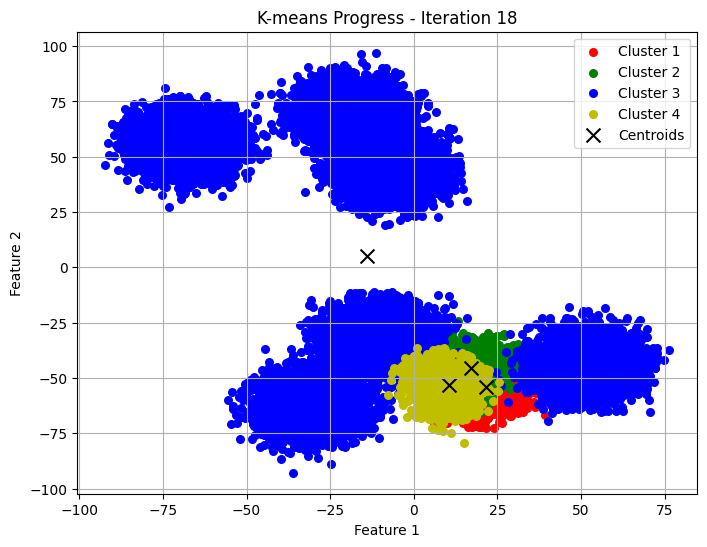

K-Means iteration 19/100


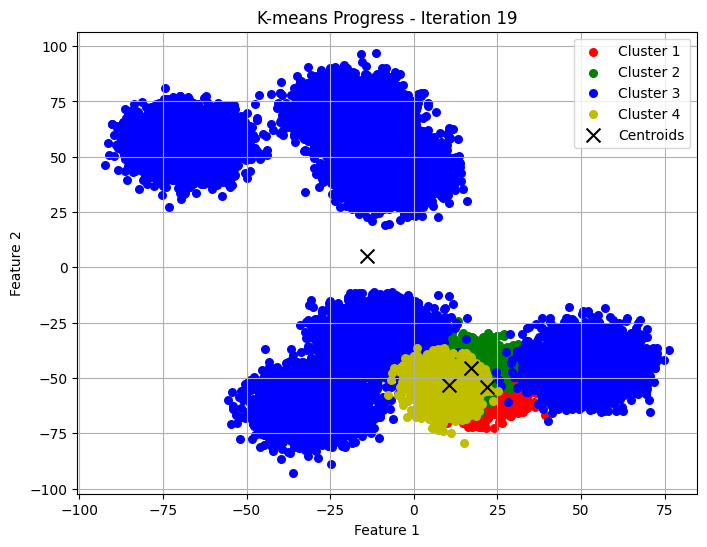

K-Means iteration 20/100


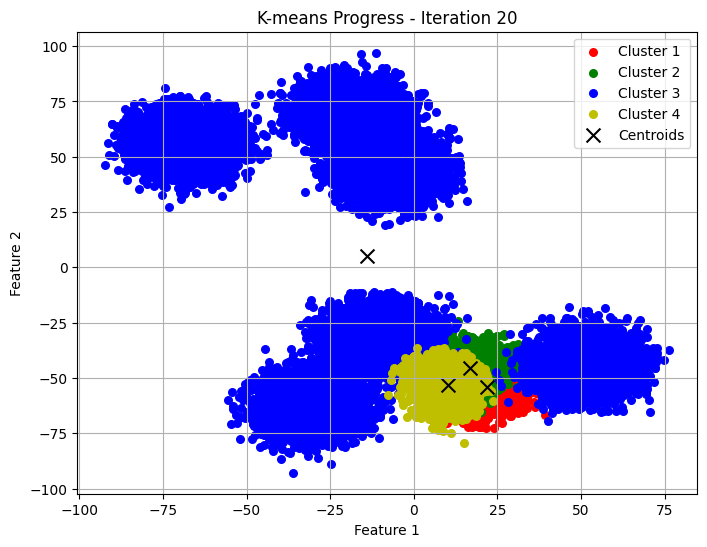

K-Means iteration 21/100


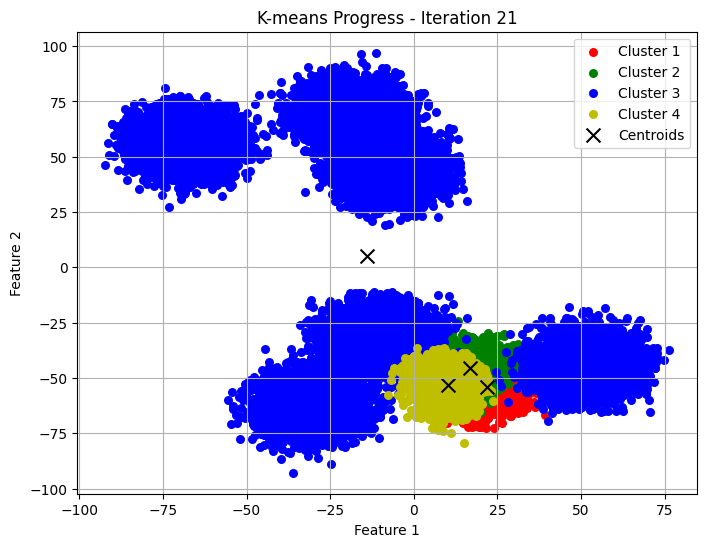

K-Means iteration 22/100


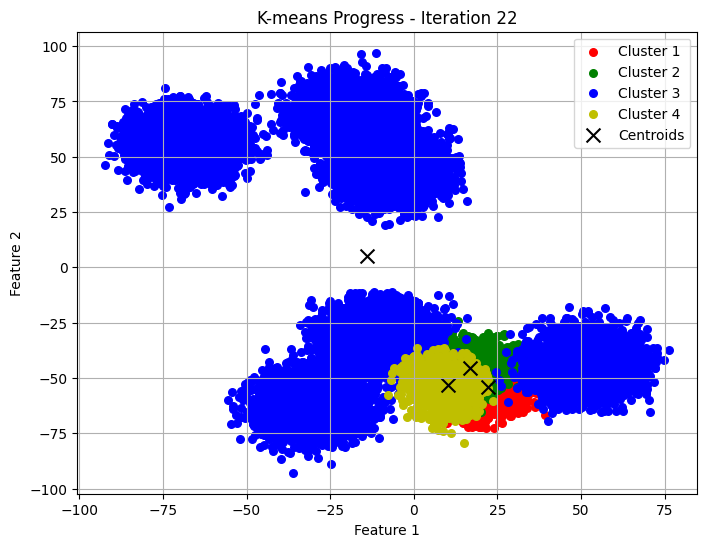

K-Means iteration 23/100


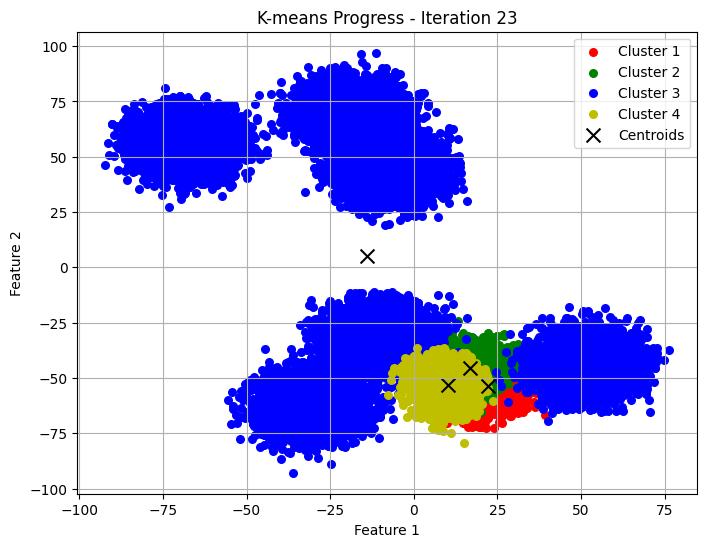

K-Means iteration 24/100


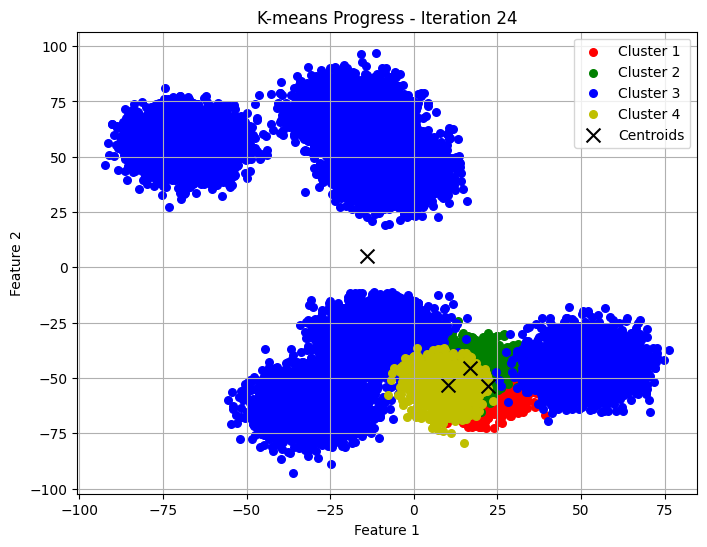

K-Means iteration 25/100


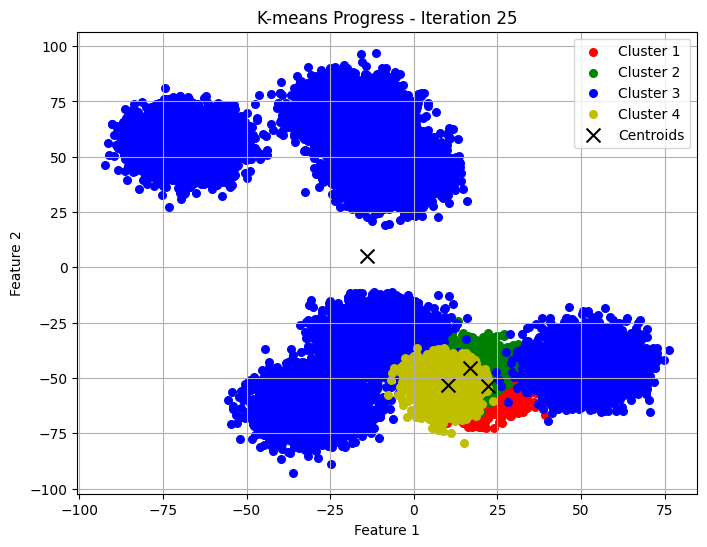

K-Means iteration 26/100


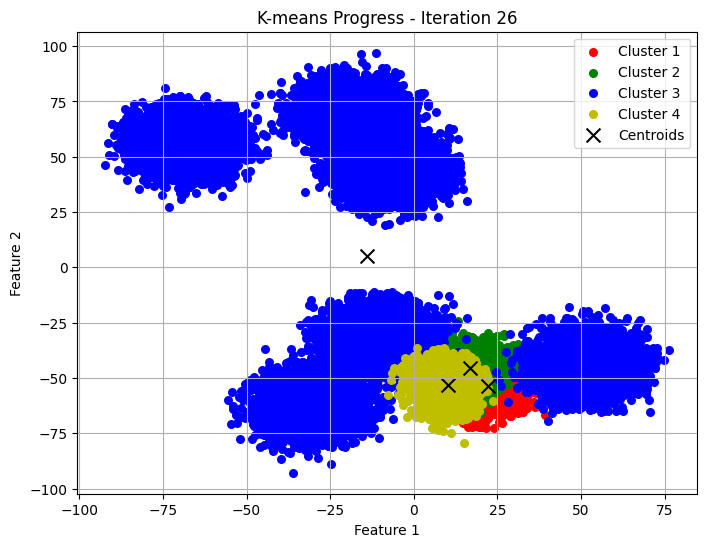

K-Means iteration 27/100


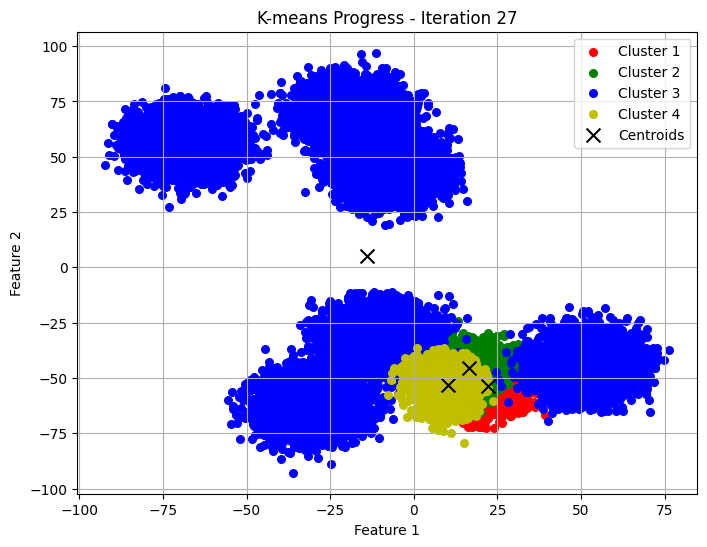

K-Means iteration 28/100


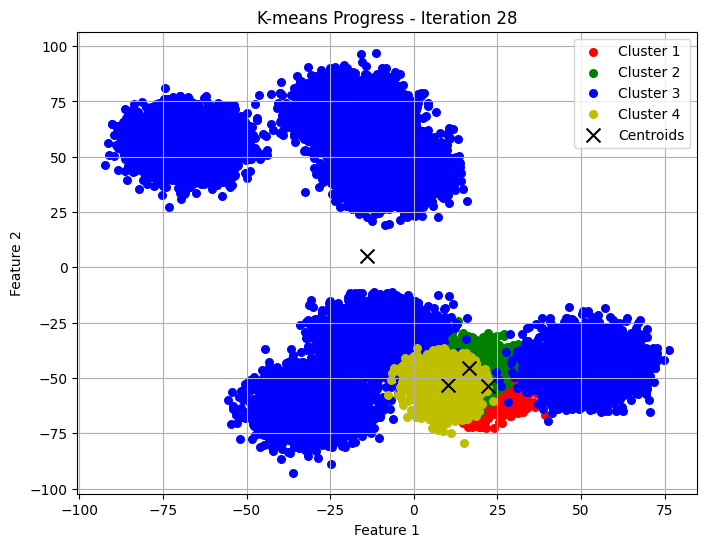

K-Means iteration 29/100


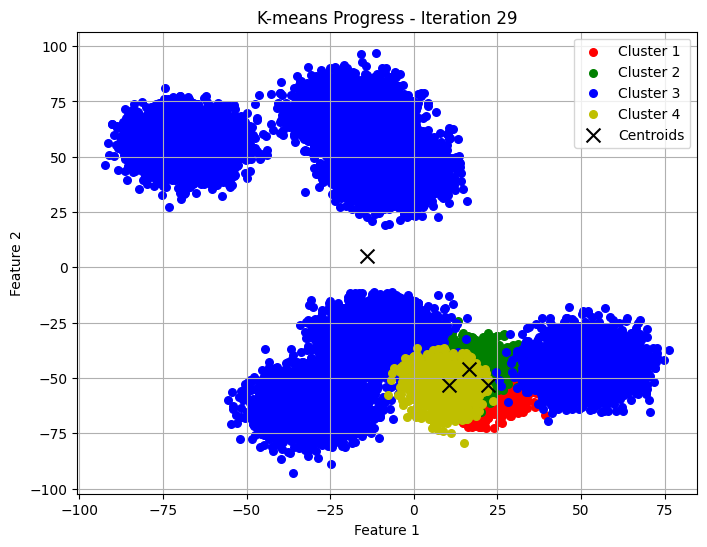

K-Means iteration 30/100


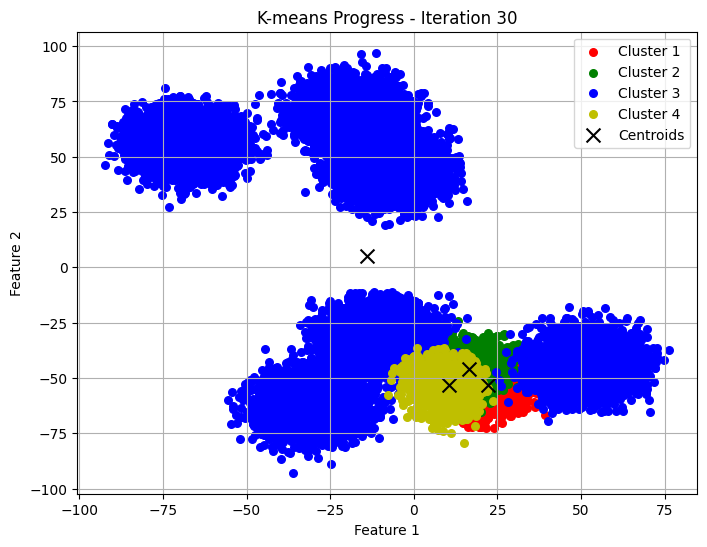

K-Means iteration 31/100


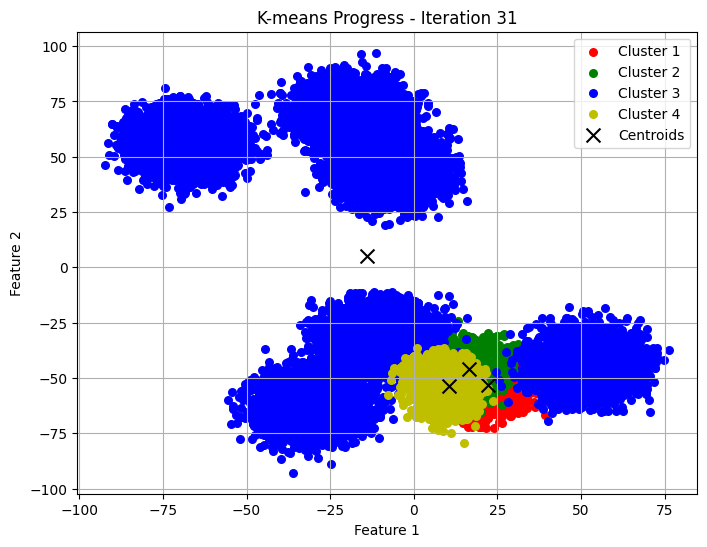

K-Means iteration 32/100


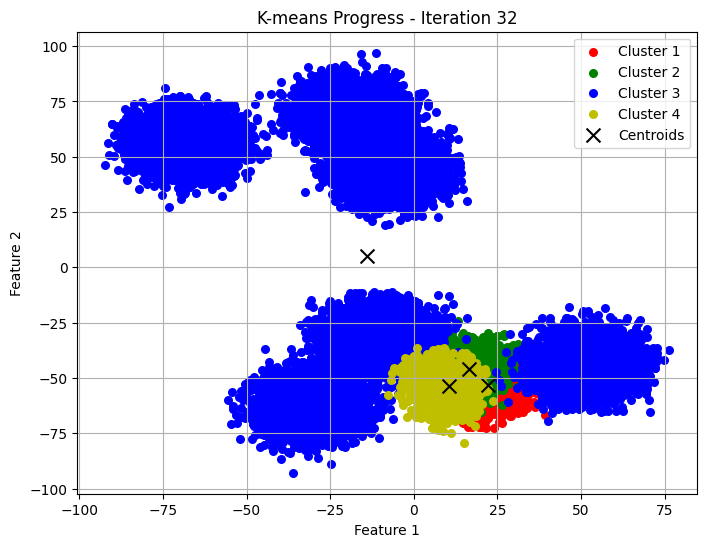

K-Means iteration 33/100


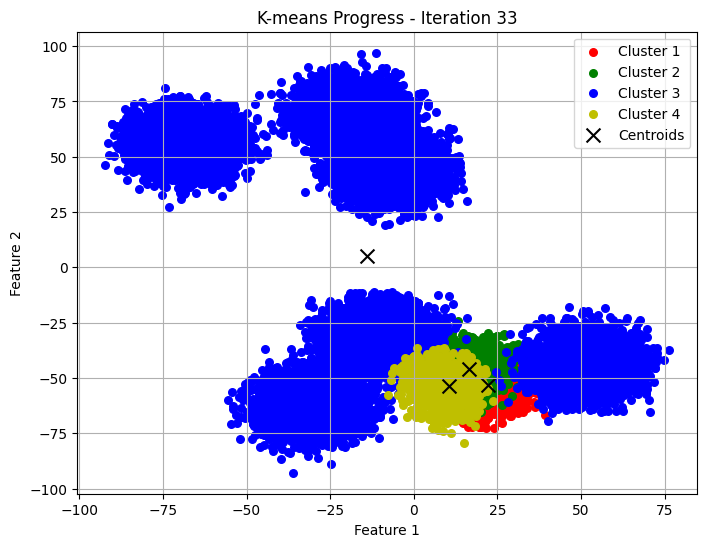

K-Means iteration 34/100


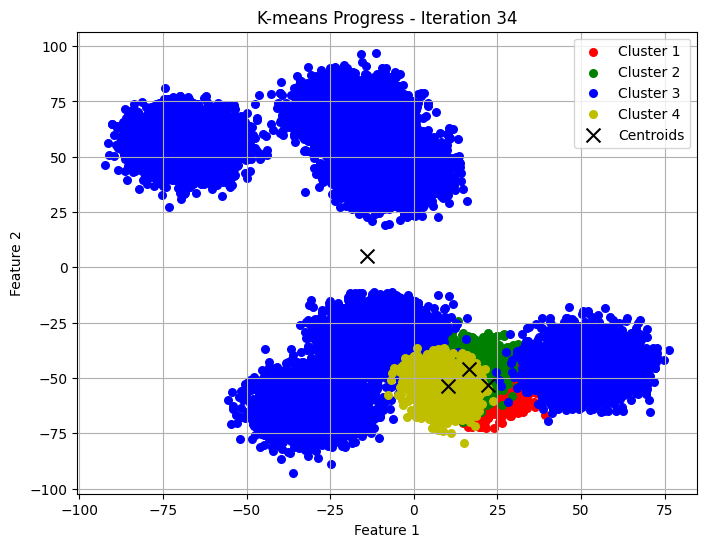

K-Means iteration 35/100


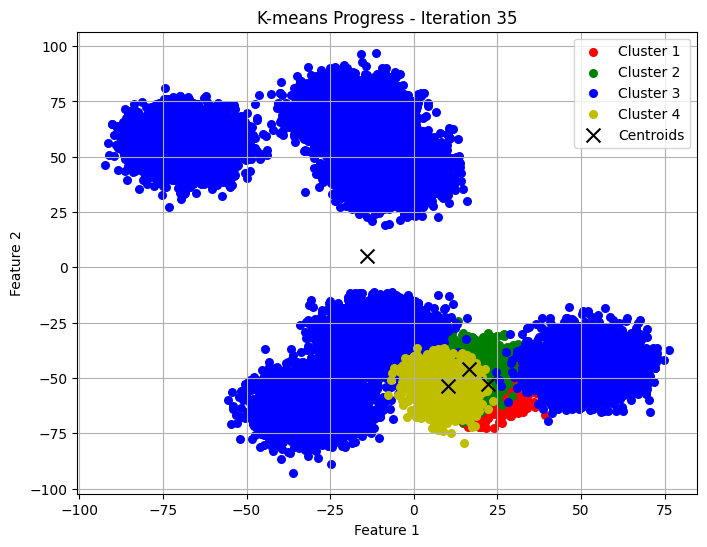

K-Means iteration 36/100


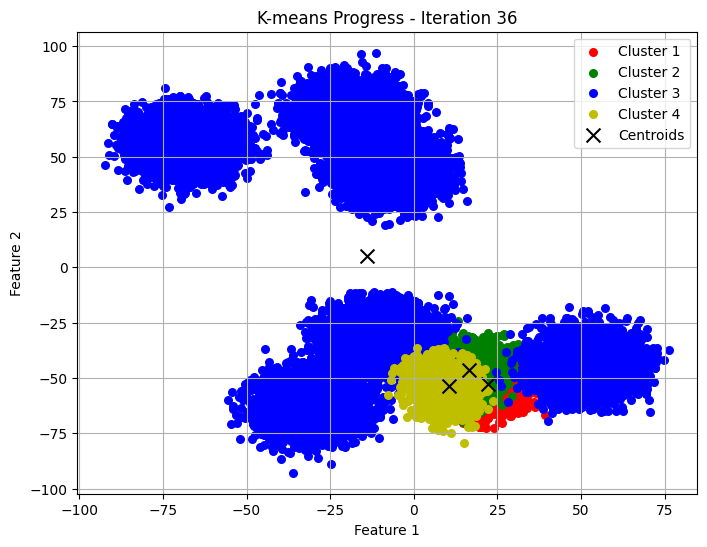

K-Means iteration 37/100


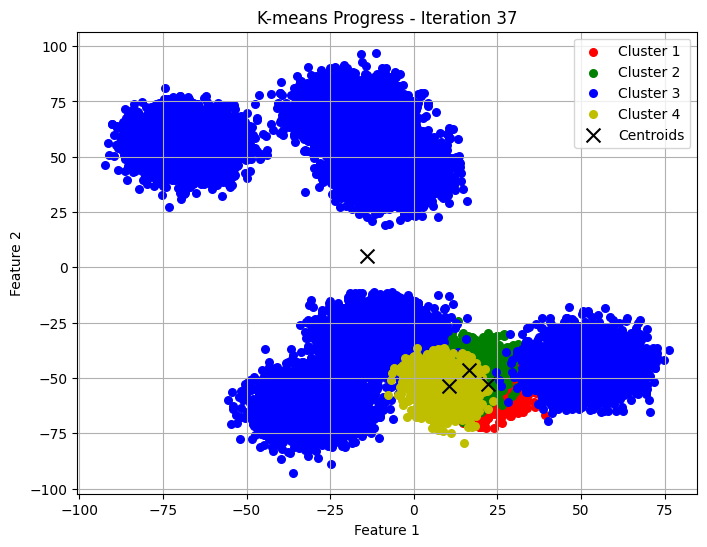

K-Means iteration 38/100


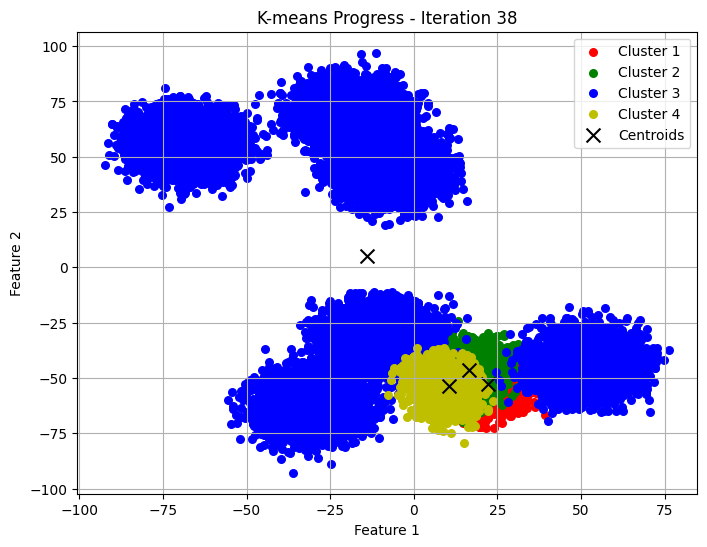

K-Means iteration 39/100


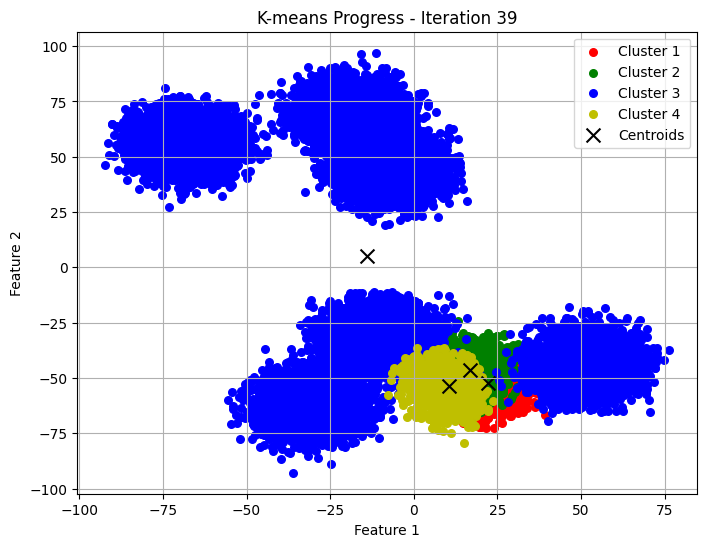

K-Means iteration 40/100


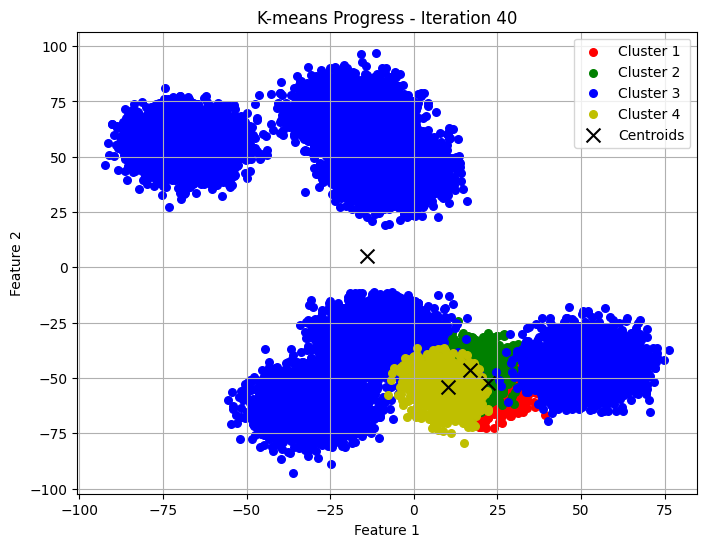

K-Means iteration 41/100


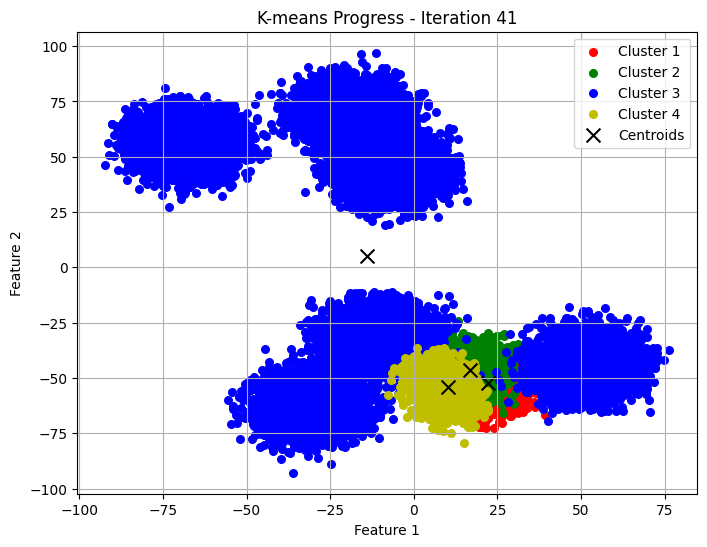

K-Means iteration 42/100


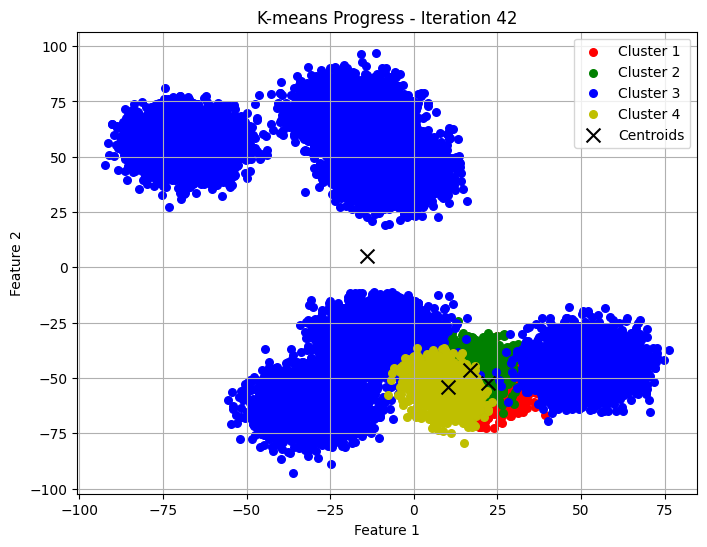

K-Means iteration 43/100


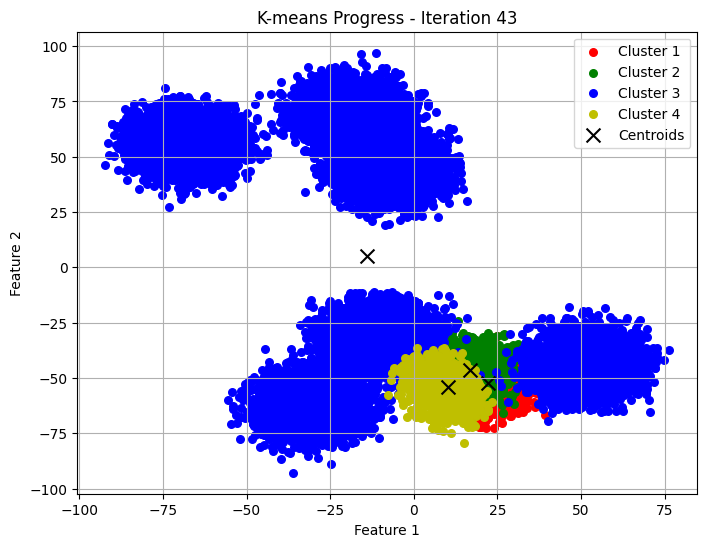

K-Means iteration 44/100


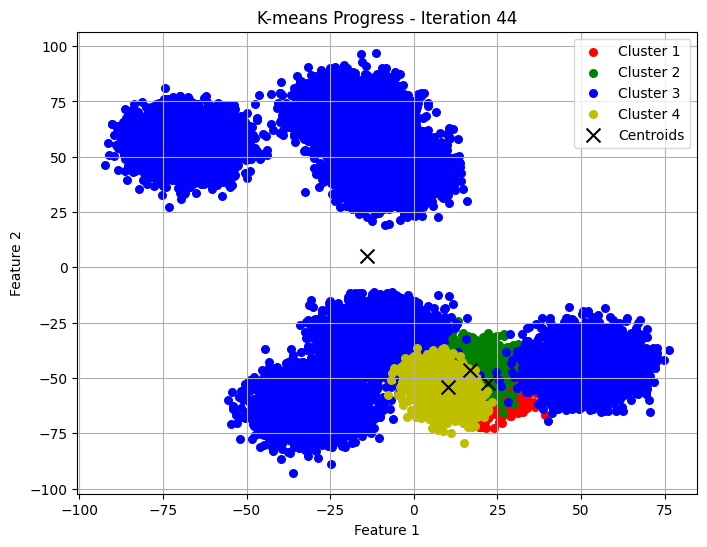

K-Means iteration 45/100


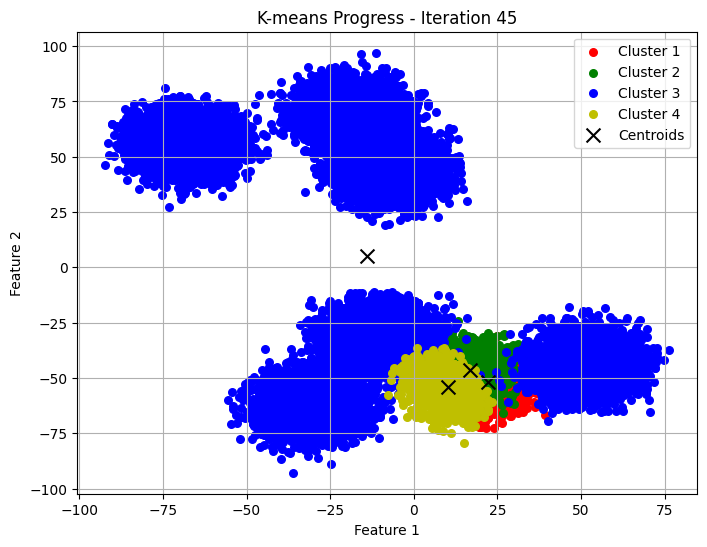

K-Means iteration 46/100


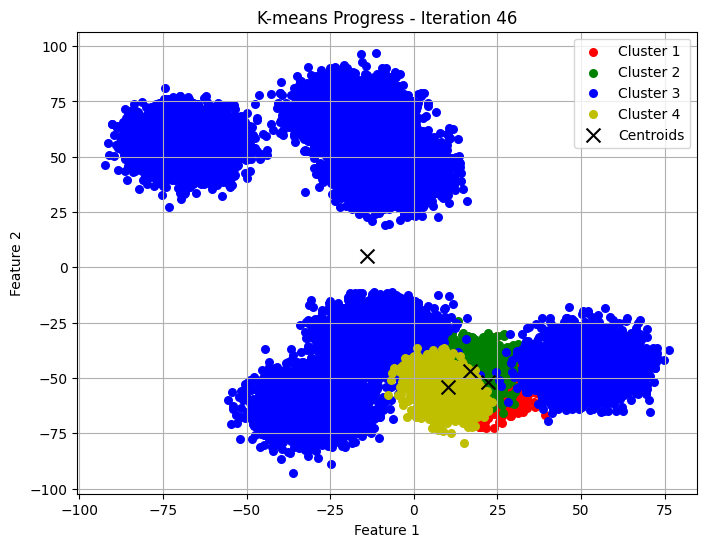

K-Means iteration 47/100


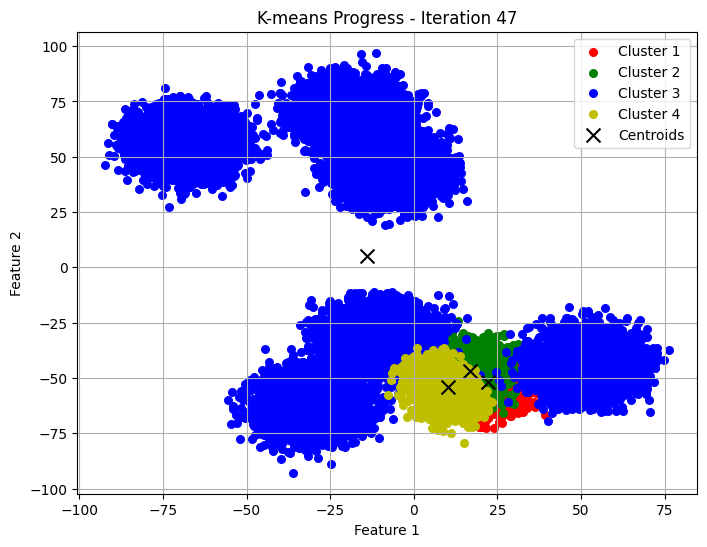

K-Means iteration 48/100


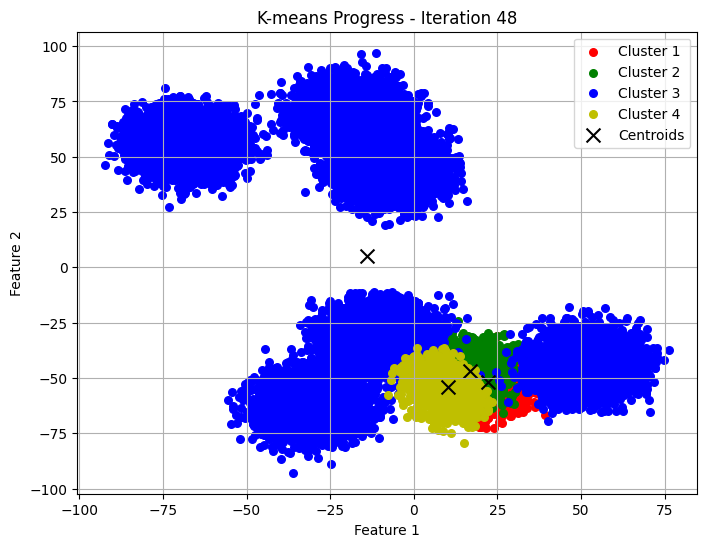

K-Means iteration 49/100


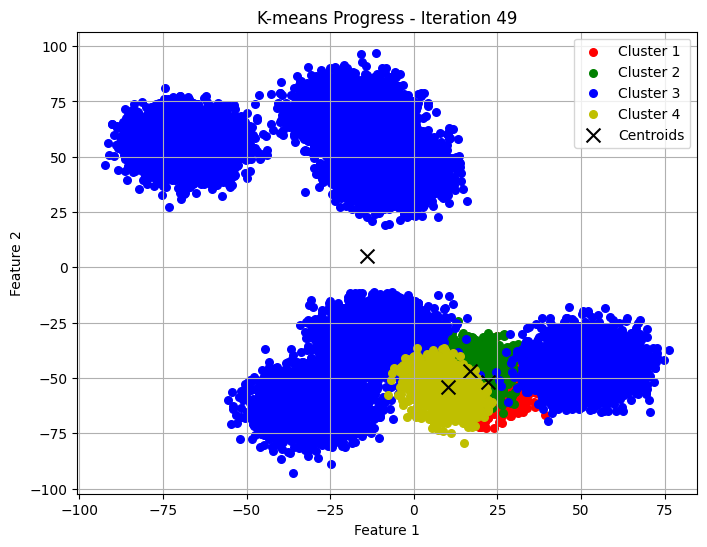

K-Means iteration 50/100


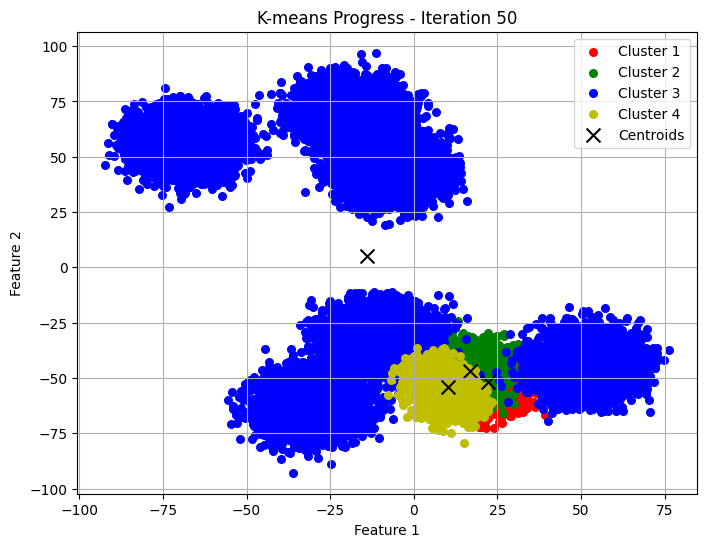

K-Means iteration 51/100


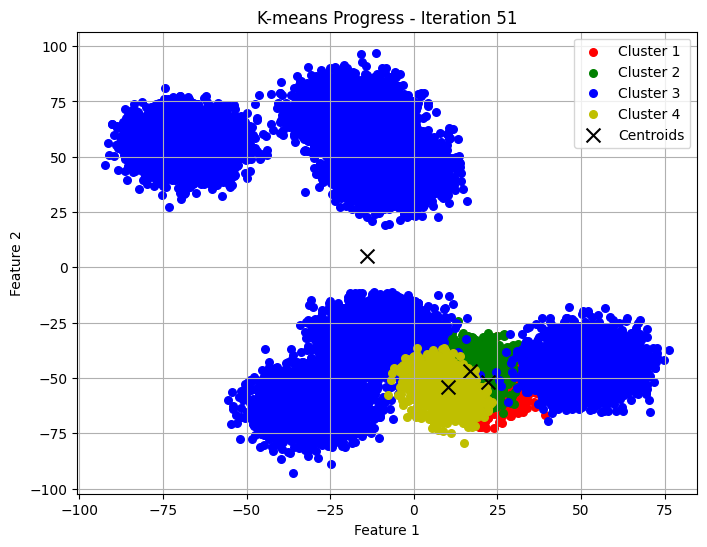

K-Means iteration 52/100


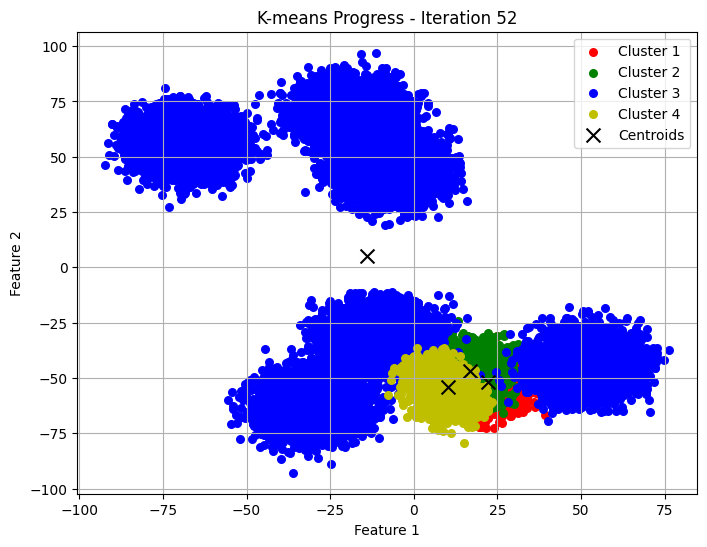

K-Means iteration 53/100


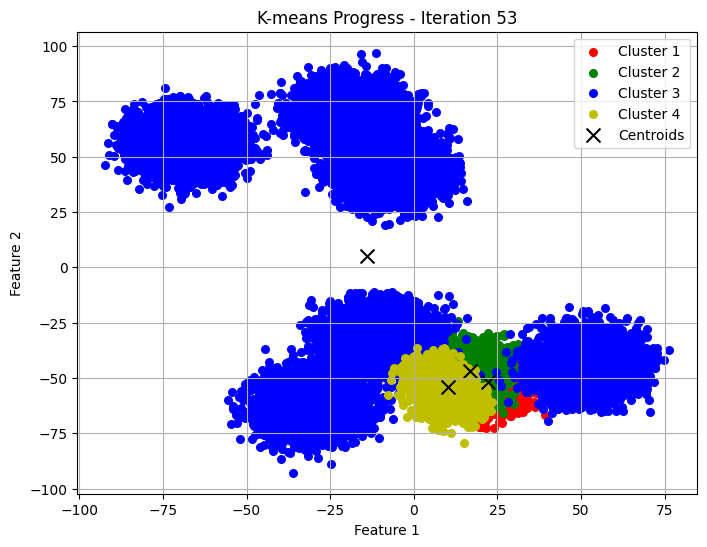

K-Means iteration 54/100


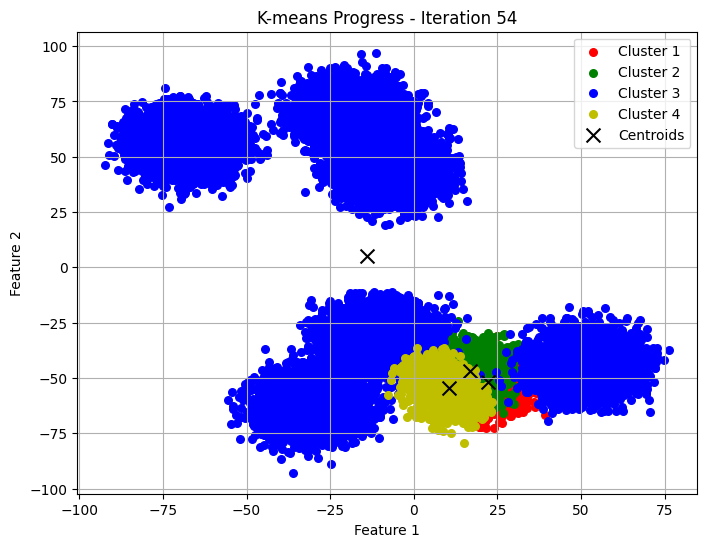

K-Means iteration 55/100


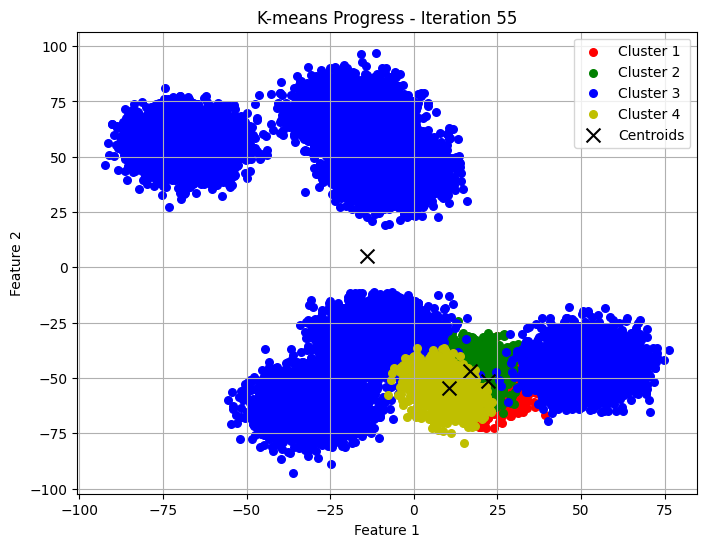

K-Means iteration 56/100


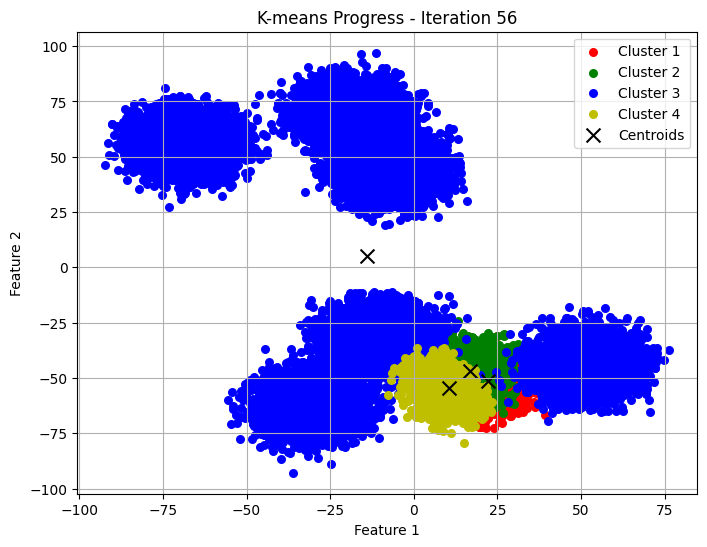

K-Means iteration 57/100


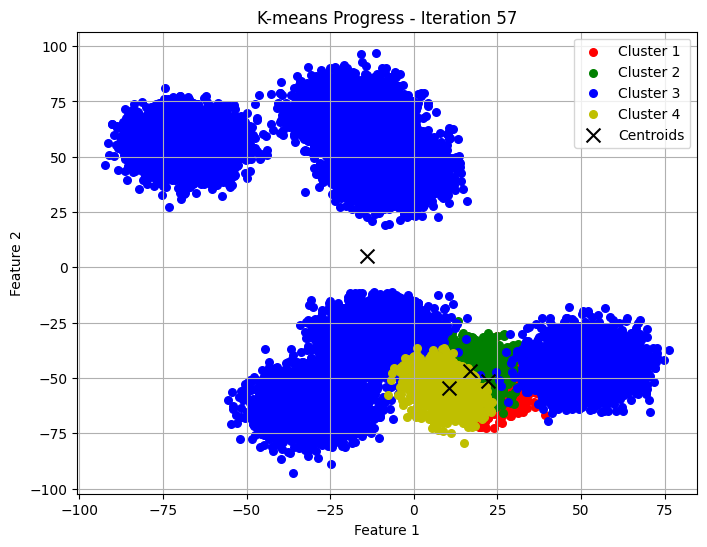

K-Means iteration 58/100


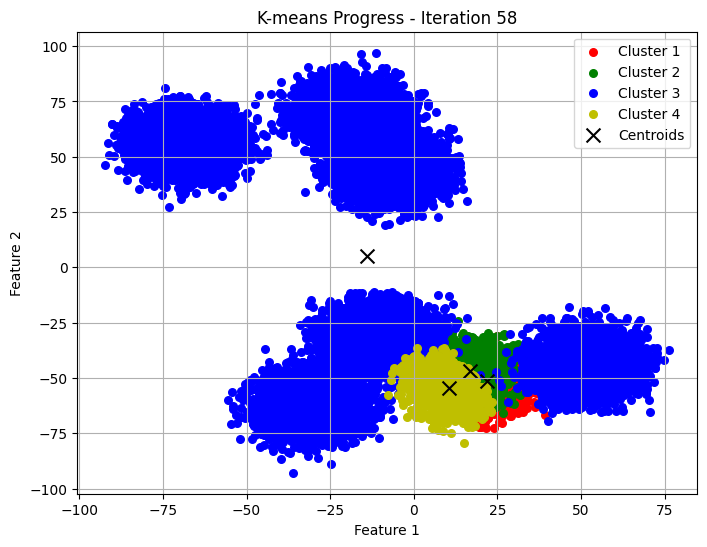

K-Means iteration 59/100


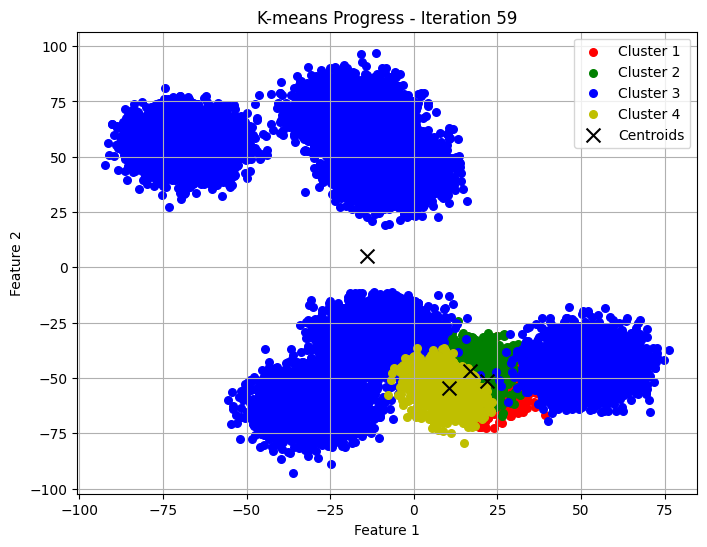

K-Means iteration 60/100


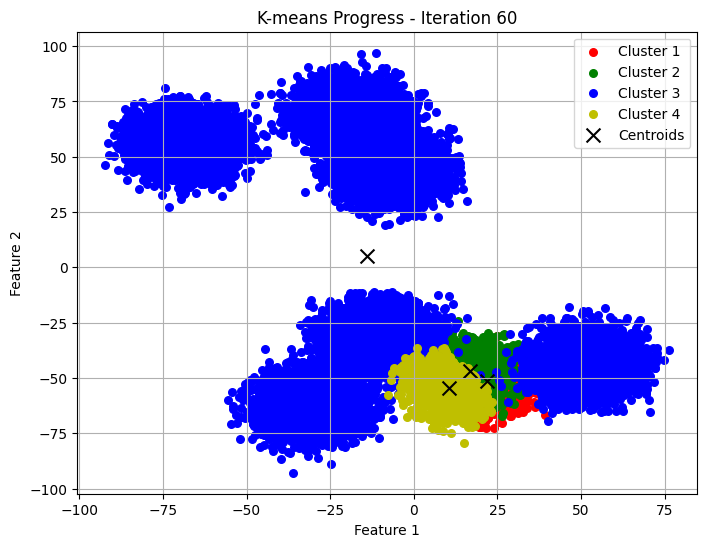

K-Means iteration 61/100


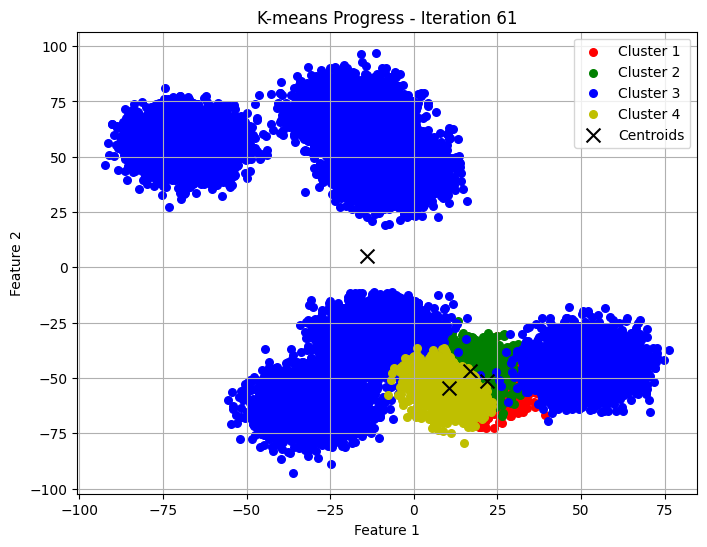

K-Means iteration 62/100


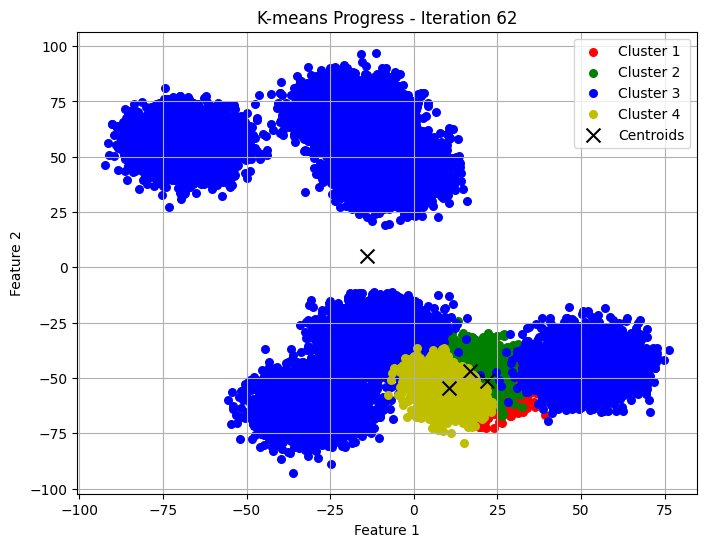

K-Means iteration 63/100


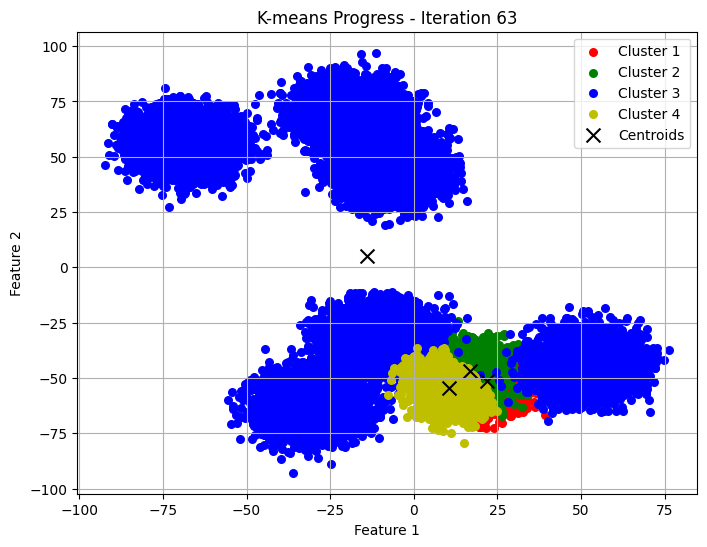

K-Means iteration 64/100


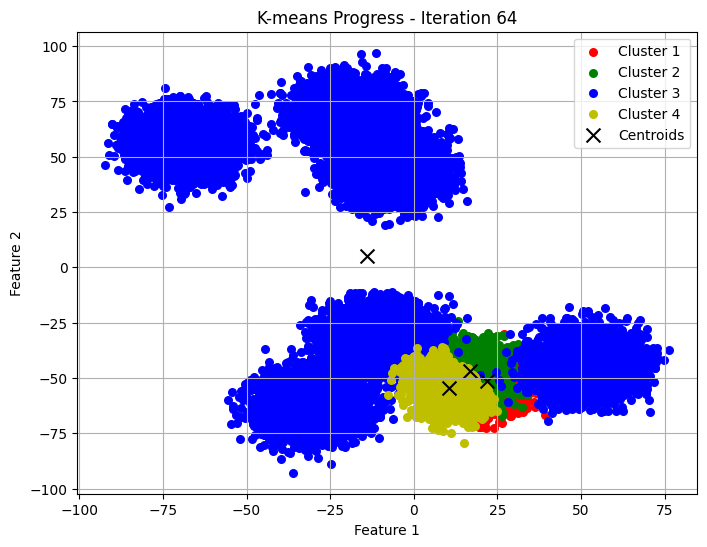

K-Means iteration 65/100


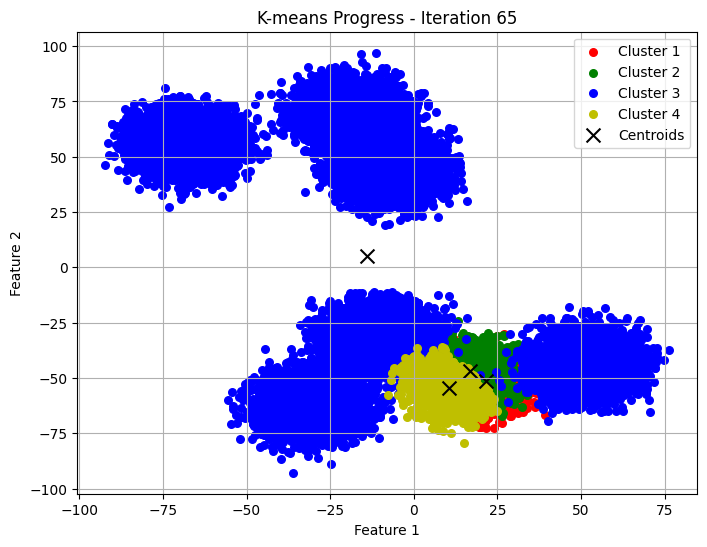

K-Means iteration 66/100


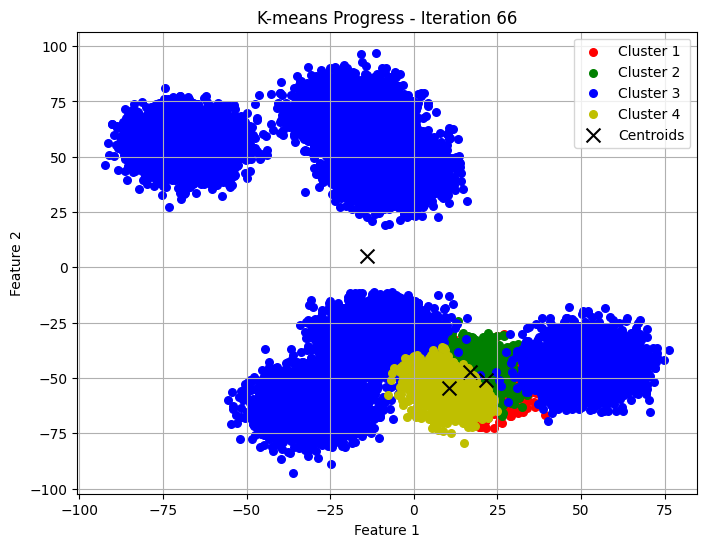

K-Means iteration 67/100


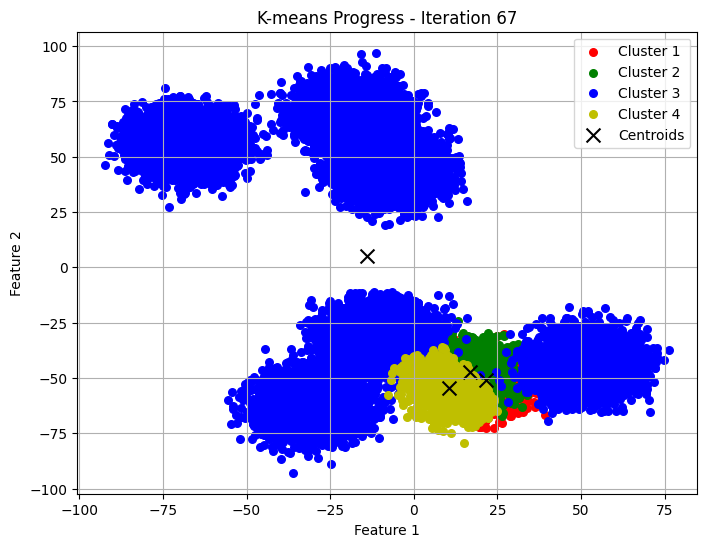

K-Means iteration 68/100


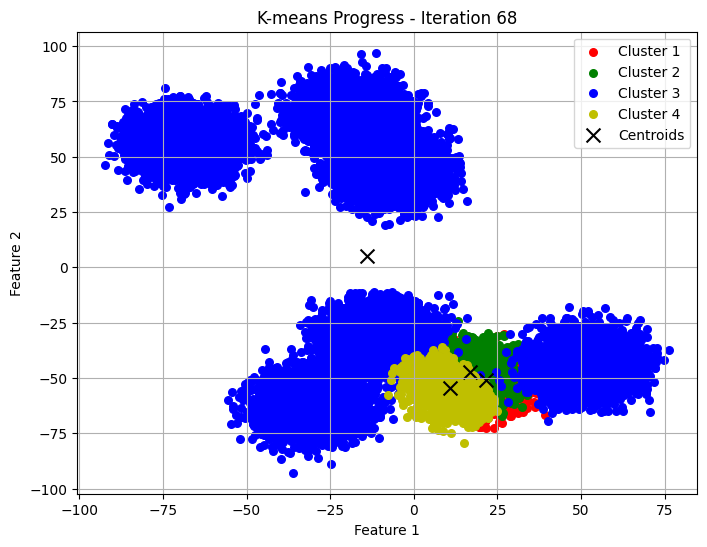

K-Means iteration 69/100


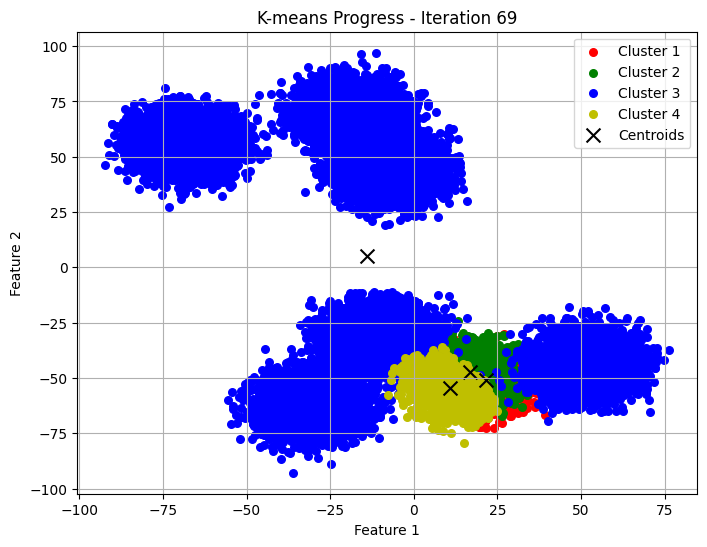

K-Means iteration 70/100


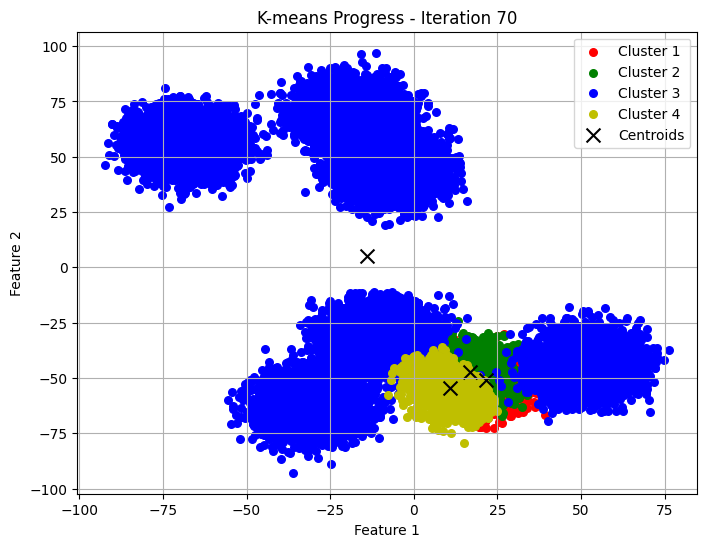

K-Means iteration 71/100


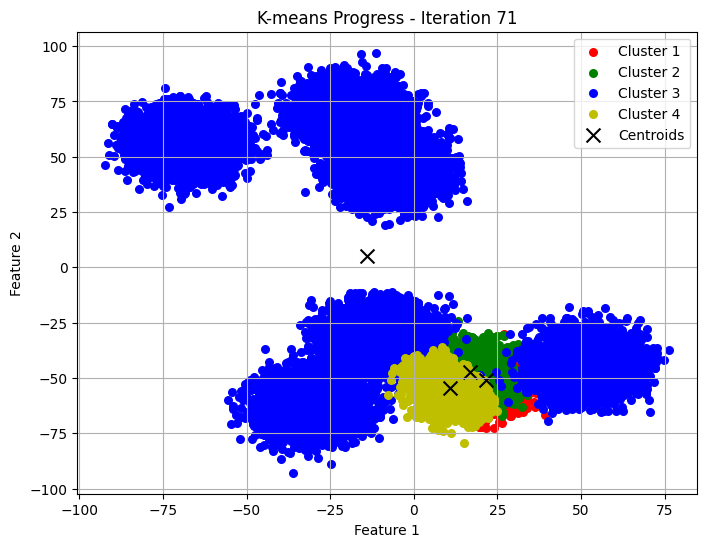

K-Means iteration 72/100


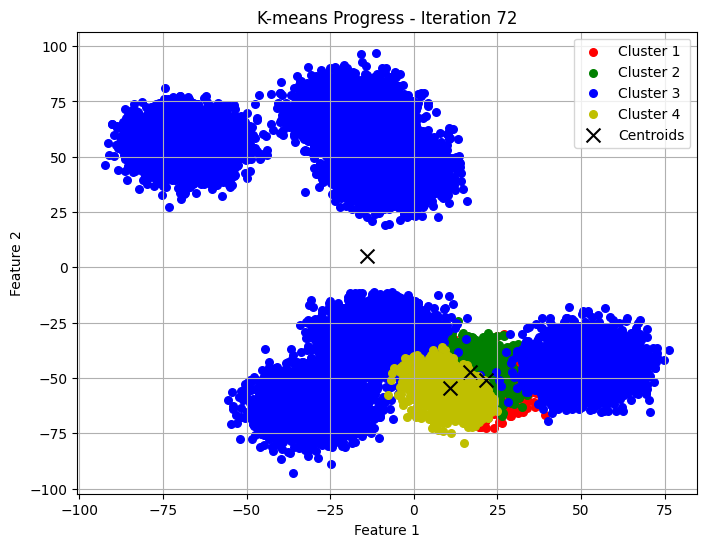

K-Means iteration 73/100


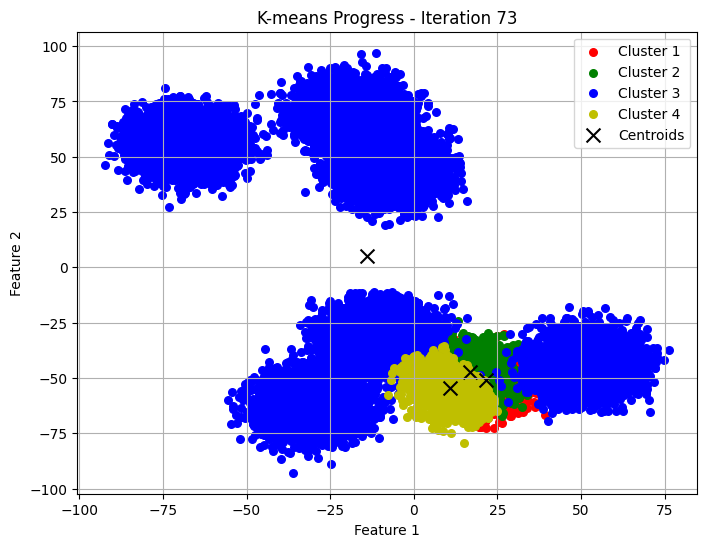

K-Means iteration 74/100


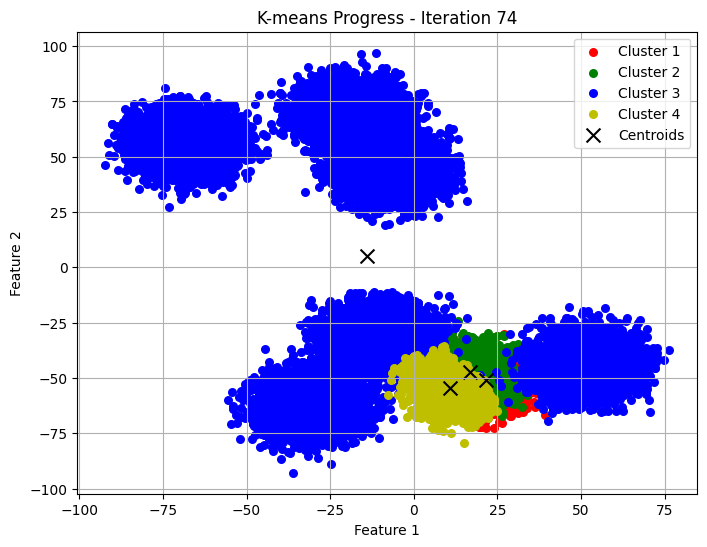

K-Means iteration 75/100


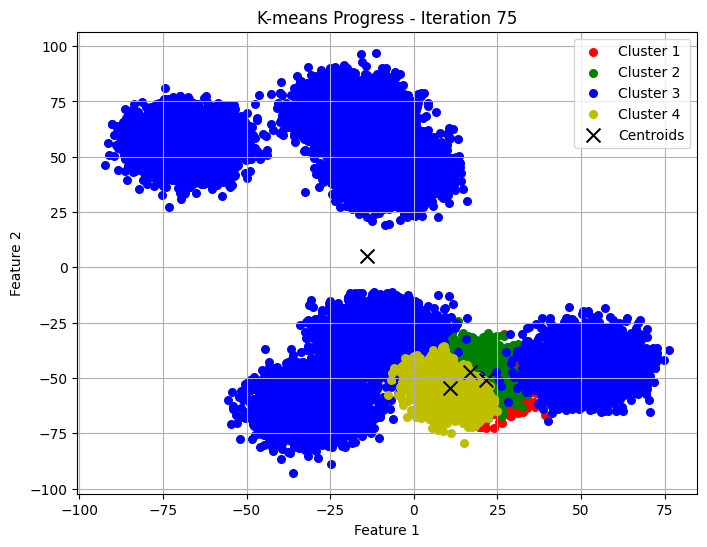

K-Means iteration 76/100


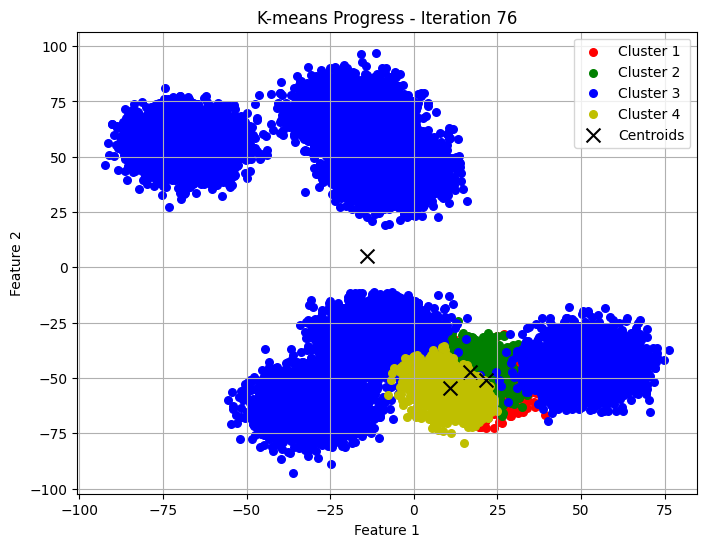

K-Means iteration 77/100


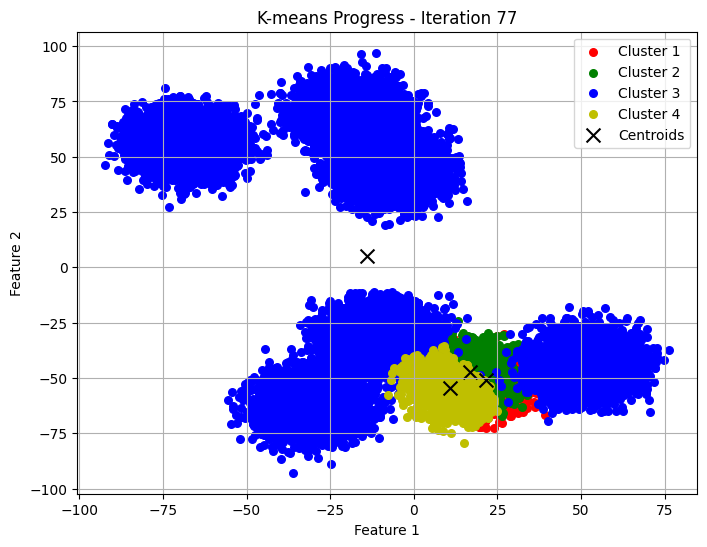

K-Means iteration 78/100


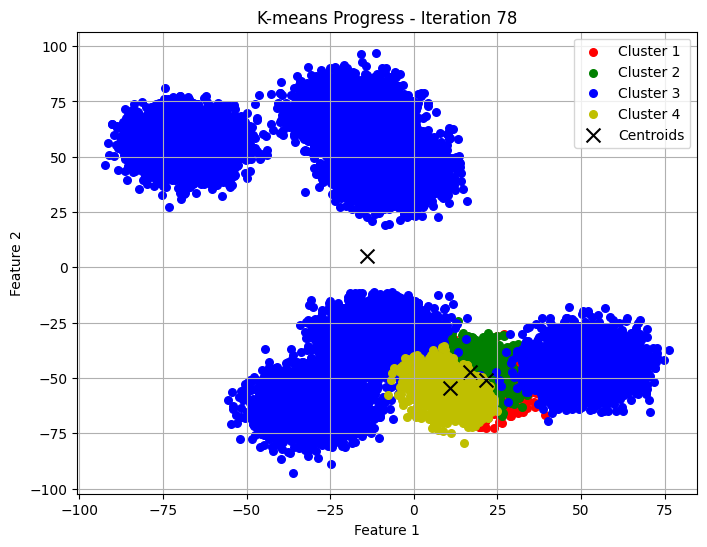

K-Means iteration 79/100


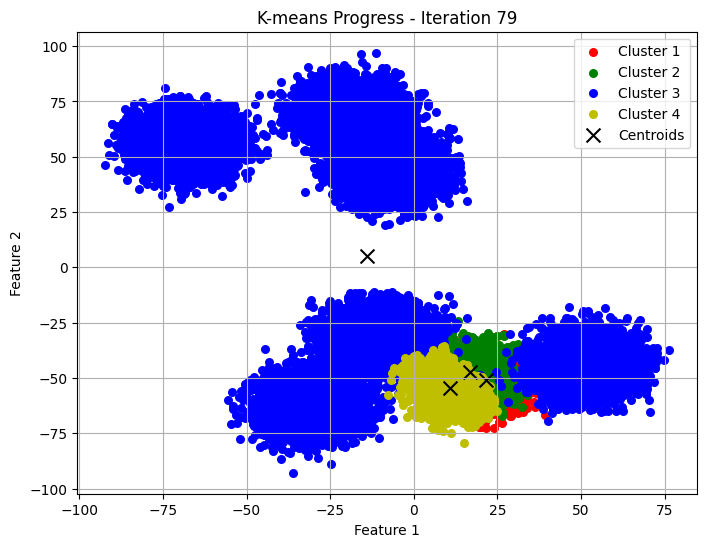

K-Means iteration 80/100


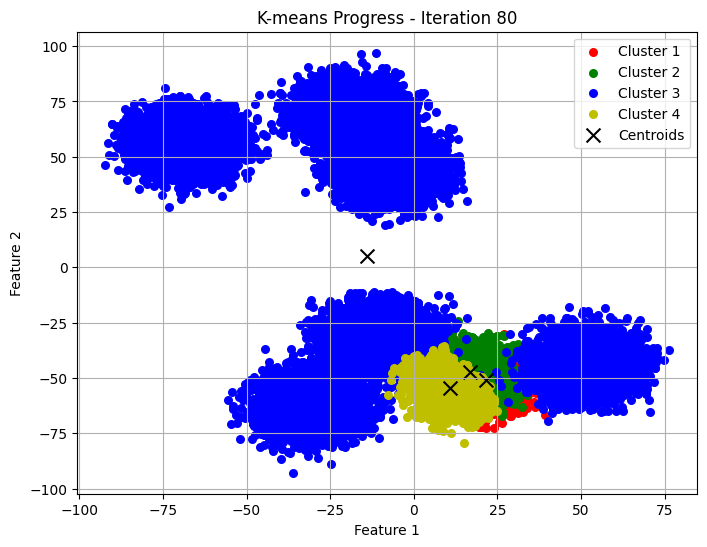

Convergence reached!


In [ ]:
max_iterations=100
k=4
clusters, centroids, wcss=run_Kmeans(k,x,max_iterations,True)